In [34]:
from pandas import Series
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import datetime

import seaborn as sns
import ggplot
from ggplot import aes
import altair

In [19]:
#Set Data Size
N = int(1000)

base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(0, (N))]
date_list = date_list*4


data = {'dt': date_list,
        'kind': list(('A'*N)+('B'*N)+('C'*N)+('D'*N)),
        'value': np.random.randn(N*4).cumsum()}
ts = pd.DataFrame(data)
pd.DataFrame.head(ts)

,dt,kind,value
0,2016-11-10 21:37:59.850,A,0.735619
1,2016-11-09 21:37:59.850,A,2.538396
2,2016-11-08 21:37:59.850,A,1.741017
3,2016-11-07 21:37:59.850,A,2.571177
4,2016-11-06 21:37:59.850,A,2.538449


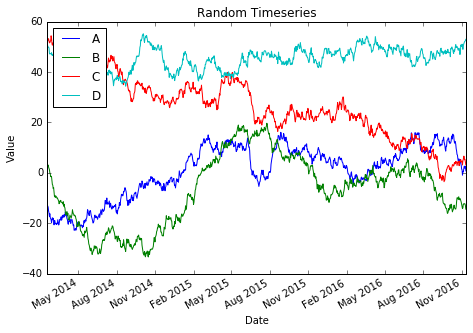

In [20]:
#Plot multiple time series on the same graph in matplotlib

fig, ax = plt.subplots(1, 1,
                       figsize=(7.5, 5))
 
for k in ts.kind.unique():
    tmp = ts[ts.kind == k]
    ax.plot(tmp.dt, tmp.value, label=k)
 
ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')    
 
ax.legend(loc=2)
fig.autofmt_xdate()

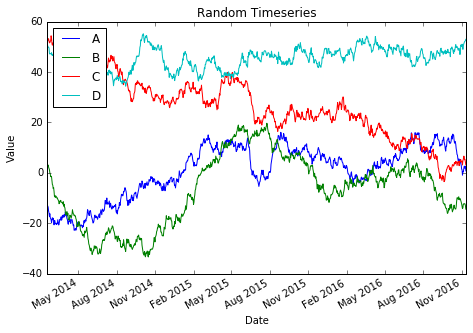

In [23]:
#Another version of the timeseries in matplotlib
dfp = ts.pivot(index='dt', columns='kind', values='value')
#dfp.head()

fig, ax = plt.subplots(1, 1,
                       figsize=(7.5, 5))
 
ax.plot(dfp)
 
ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')
 
ax.legend(dfp.columns, loc=2)
fig.autofmt_xdate()

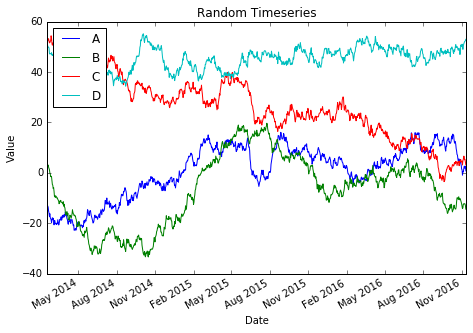

In [24]:
#Plot multiple time series on the same graph in PANDAS

# PANDAS
fig, ax = plt.subplots(1, 1,
                       figsize=(7.5, 5))
 
dfp.plot(ax=ax)
 
ax.set(xlabel='Date',
       ylabel='Value',
       title='Random Timeseries')
 
ax.legend(loc=2)
fig.autofmt_xdate()

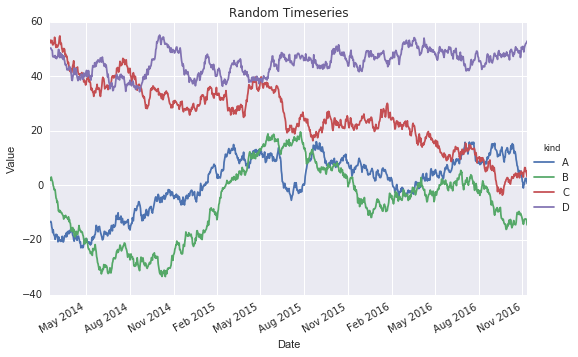

In [28]:
#Plot multiple time series on the same graph using Seaborn

g = sns.FacetGrid(ts, hue='kind', size=5, aspect=1.5)
g.map(plt.plot, 'dt', 'value').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Value',
         title='Random Timeseries')
g.fig.autofmt_xdate()

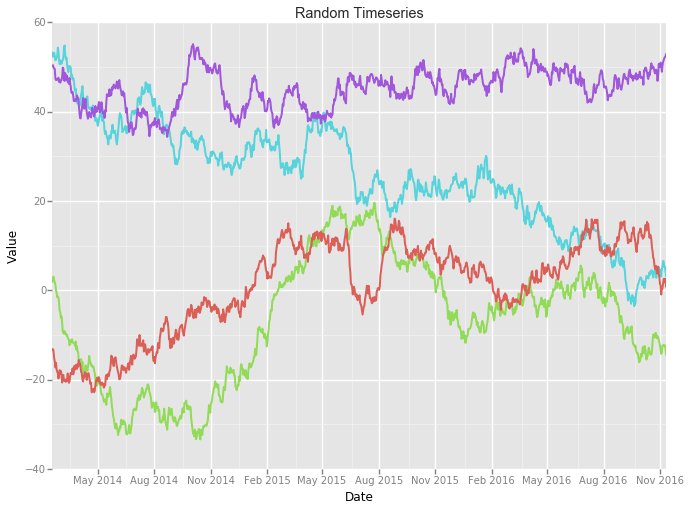

<ggplot: (18446277)>

In [42]:
#Plot multiple time series on the same graph using ggplot

# GGPLOT
 
g = ggplot.ggplot(ts, ggplot.aes(x='dt', y='value', color='kind')) + \
        ggplot.geom_line(size=2.0) + \
        ggplot.xlab('Date') + \
        ggplot.ylab('Value') + \
        ggplot.ggtitle('Random Timeseries')
g

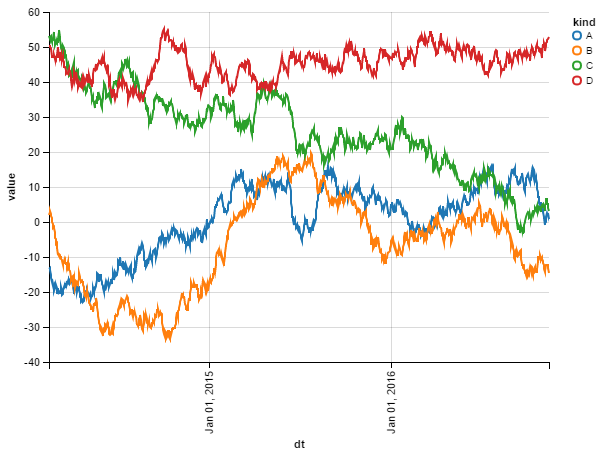

In [45]:
#Plot multiple time series on the same graph using Altair

c = altair.Chart(ts).mark_line().encode(
    x='dt',
    y='value',
    color='kind'
)
c

In [48]:
df = pd.read_csv('IrisData.csv', names=['sepalLength','sepalWidth','petalLength','petalWidth','species'])
#df.head

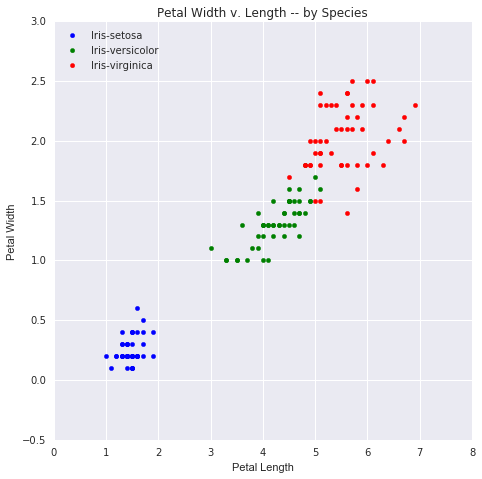

In [51]:
#Create a scatter plot using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))

cp = ['b','g','r','k']

for i, s in enumerate(df.species.unique()):
    tmp = df[df.species == s]
    ax.scatter(tmp.petalLength, tmp.petalWidth,
               label=s, color=cp[i])
 
ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')
 
ax.legend(loc=2)


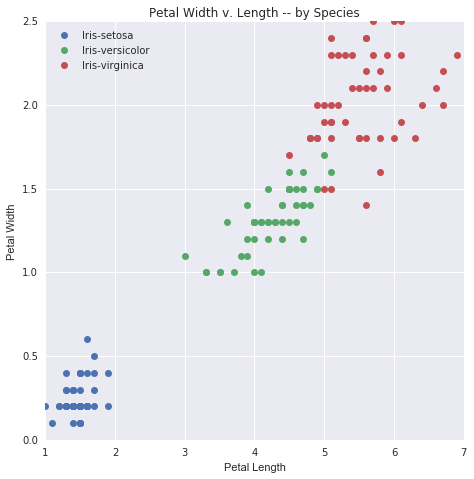

In [52]:
#Another option in matplotlib

fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))
 
def scatter(group):
    plt.plot(group['petalLength'],
             group['petalWidth'],
             'o', label=group.name)
 
df.groupby('species').apply(scatter)
 
ax.set(xlabel='Petal Length',
       ylabel='Petal Width',
       title='Petal Width v. Length -- by Species')
 
ax.legend(loc=2)

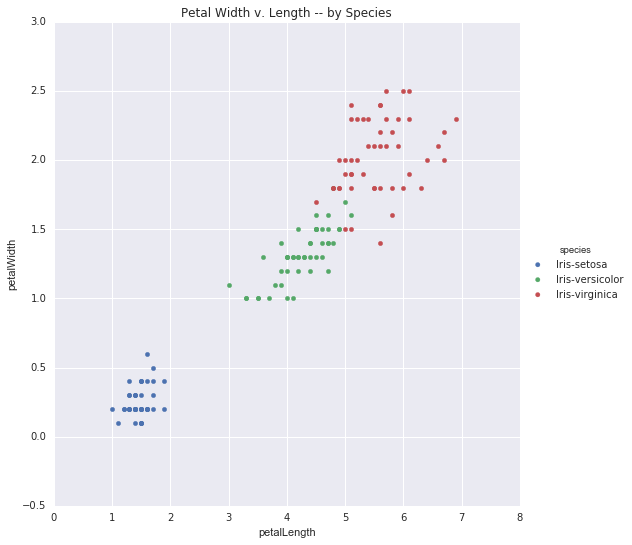

In [53]:
#Create a scatter plot using Seaborn

g = sns.FacetGrid(df, hue='species', size=7.5)
g.map(plt.scatter, 'petalLength', 'petalWidth').add_legend()
g.ax.set_title('Petal Width v. Length -- by Species')


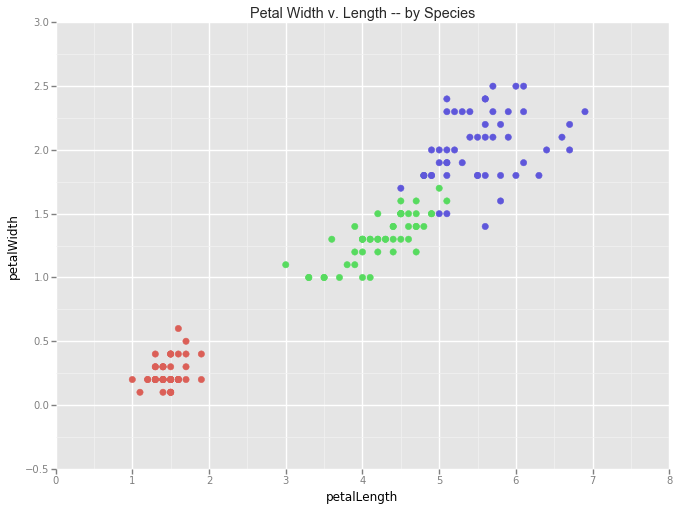

<ggplot: (15151266)>

In [64]:
#create a scatter plot using ggplot

g = ggplot.ggplot(df, ggplot.aes(x='petalLength',
                   y='petalWidth',
                   color='species')) + \
        ggplot.geom_point(size=40.0) + \
        ggplot.ggtitle('Petal Width v. Length -- by Species')
g

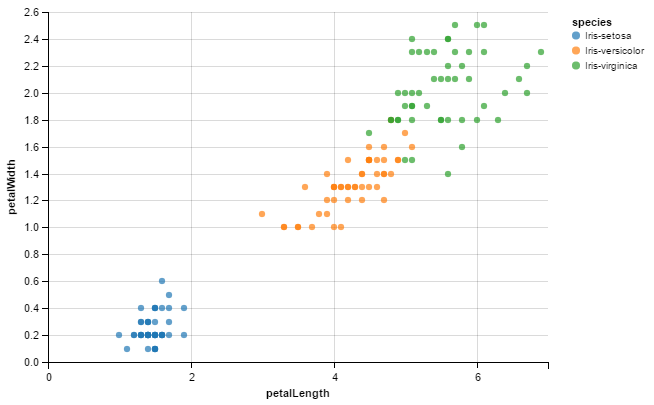

In [55]:
#create a scatter plot using Altair

c = altair.Chart(df).mark_point(filled=True).encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)
c

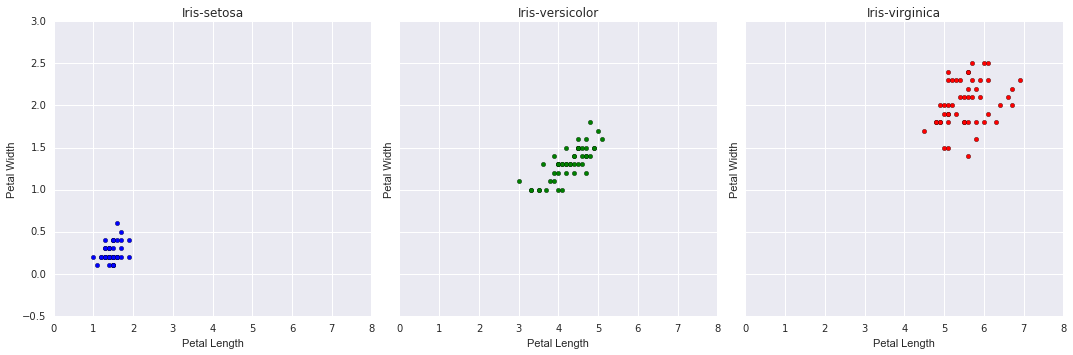

In [57]:
#Create a faceted scatter plot using matplotlib

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
 
for i, s in enumerate(df.species.unique()):
    tmp = df[df.species == s]
 
    ax[i].scatter(tmp.petalLength, tmp.petalWidth, c=cp[i])
 
    ax[i].set(xlabel='Petal Length',
              ylabel='Petal Width',
              title=s)
 
fig.tight_layout()

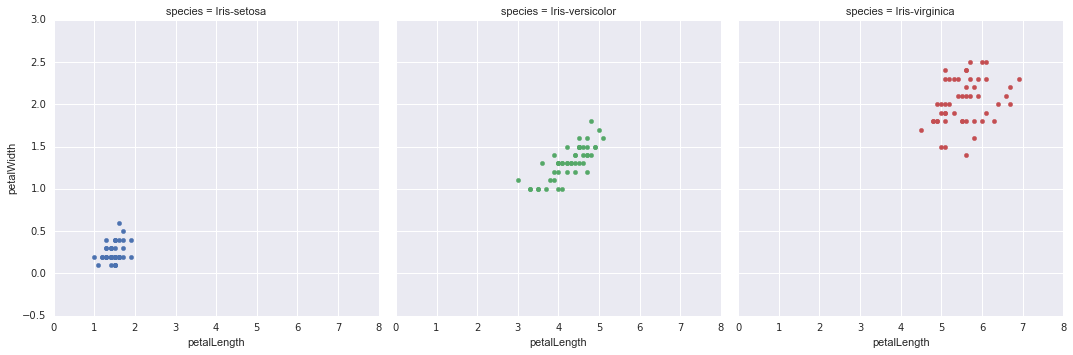

In [58]:
#Create a faceted scatter plot using Seaborn

g = sns.FacetGrid(df, col='species', hue='species', size=5)
g.map(plt.scatter, 'petalLength', 'petalWidth')

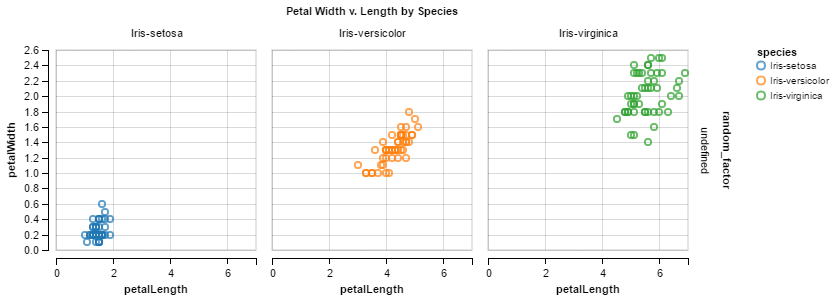

In [68]:
#create a faceted scatter plot using Altair

c = altair.Chart(df).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species',
    column=altair.Column('species',
                  title='Petal Width v. Length by Species'),
    row='random_factor'
)
c.configure_cell(height=200, width=200)


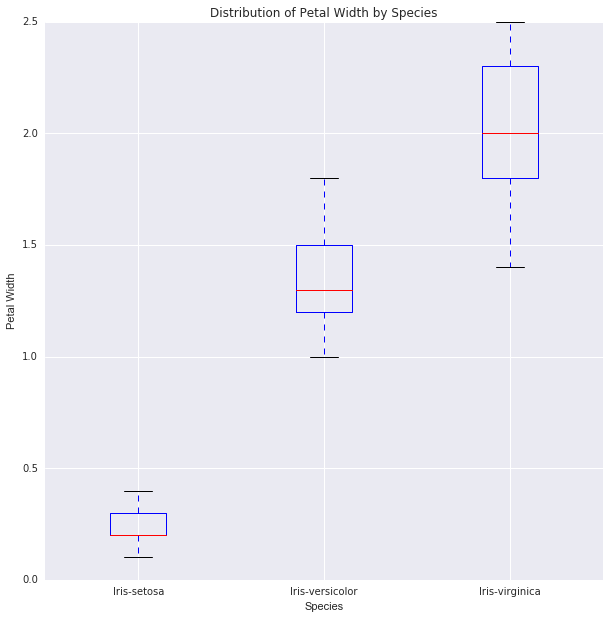

In [69]:
#Create a box and whisker plot using matplotlib

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
ax.boxplot([df[df.species == s]['petalWidth'].values
                for s in df.species.unique()])
 
ax.set(xticklabels=df.species.unique(),
       xlabel='Species',
       ylabel='Petal Width',
       title='Distribution of Petal Width by Species')


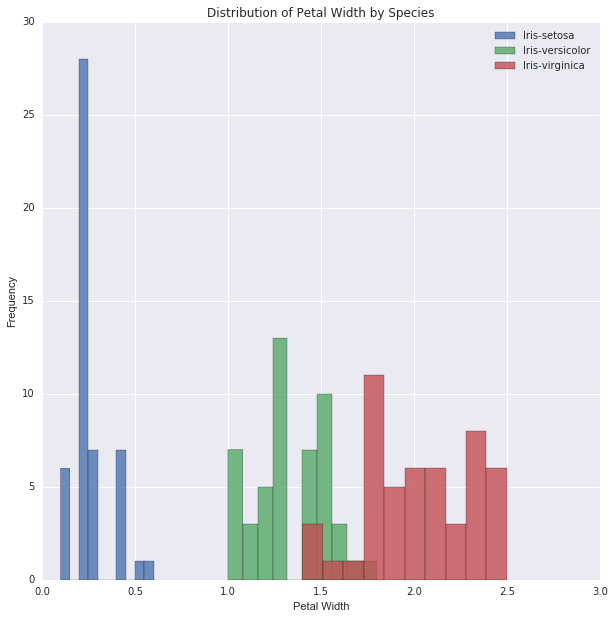

In [70]:
#Create a histogram using matplotlib

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
for i, s in enumerate(df.species.unique()):
    tmp = df[df.species == s]
    ax.hist(tmp.petalWidth, label=s, alpha=.8)
 
ax.set(xlabel='Petal Width',
       ylabel='Frequency',
       title='Distribution of Petal Width by Species')    
 
ax.legend(loc=1)


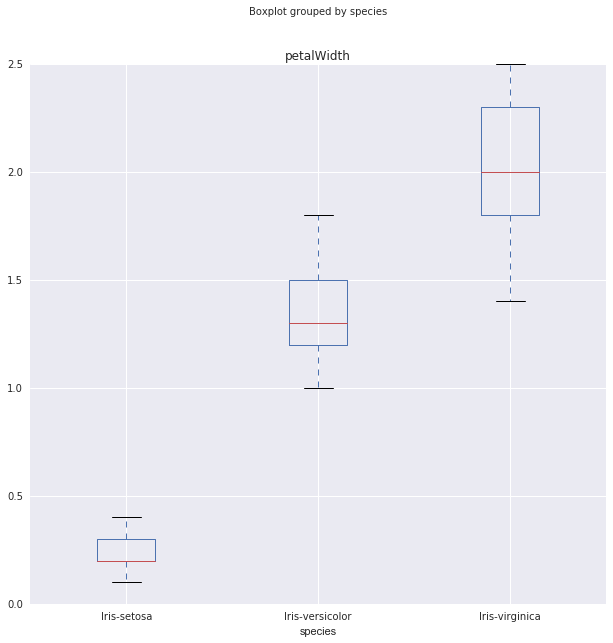

In [71]:
#Create a box and whisker plot using pandas

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
df.boxplot(column='petalWidth', by='species', ax=ax)

C:\Anaconda2\lib\site-packages\pandas\tools\plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001238B358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000107C89E8>]], dtype=object)

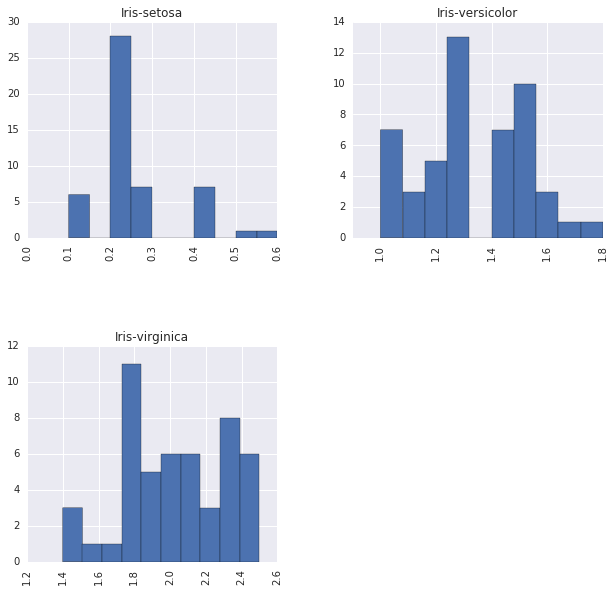

In [72]:
#Create a histogram using pandas 

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
df.hist(column='petalWidth', by='species', grid=None, ax=ax)

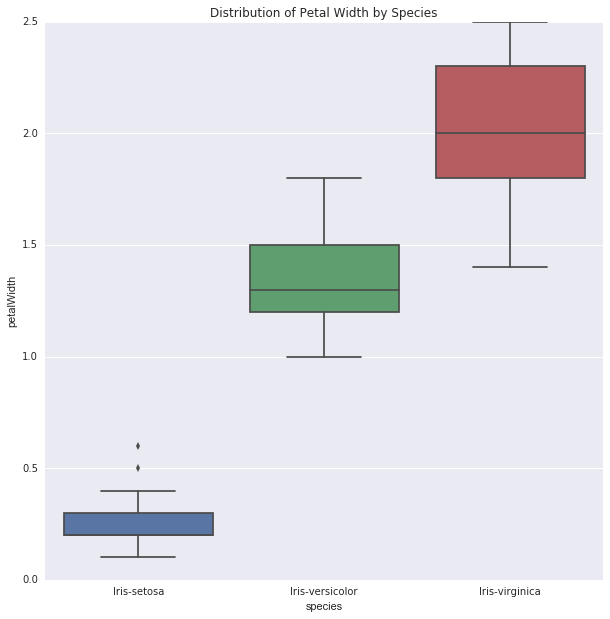

In [73]:
#Create a box and whisker plot using Seaborn

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
g = sns.boxplot('species', 'petalWidth', data=df, ax=ax)
g.set(title='Distribution of Petal Width by Species')

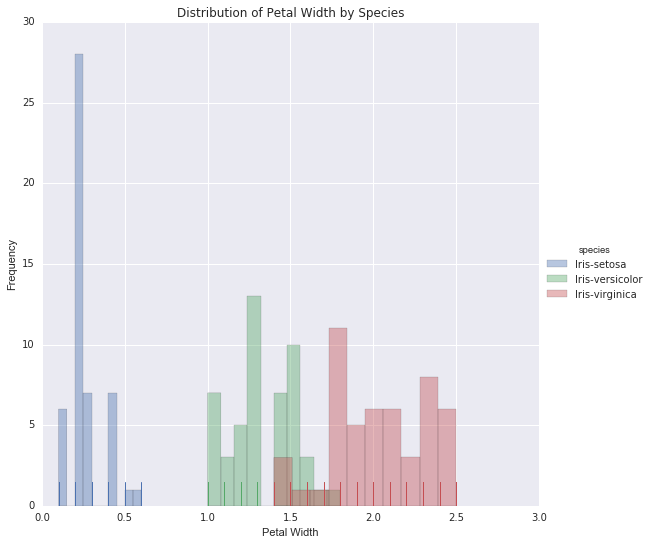

In [74]:
#Create a histogram using Seaborn

g = sns.FacetGrid(df, hue='species', size=7.5)
 
g.map(sns.distplot, 'petalWidth', bins=10,
      kde=False, rug=True).add_legend()
 
g.set(xlabel='Petal Width',
      ylabel='Frequency',
      title='Distribution of Petal Width by Species')